# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
#!pip install chart_studio

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

# Reading Data:

In [0]:
project_data = pd.read_csv('train_data.csv', nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [0]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

# Preprocessing of data:

## Preprocessing of 'categorical data':

### preprocessing of `project_subject_categories`:

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into _
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


### preprocessing of `project_subject_subcategories`:

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

### Preprocessing of `project_grade_category`:

In [0]:
#https://stackoverflow.com/questions/22623375/python-remove-all-decimals-from-a-float
from tqdm import tqdm

preprocessed_grade=[]
for grade in tqdm(project_data['project_grade_category'].values):
    grade= grade.replace("Grades", '')
    grade= grade.replace("-", 'to')
    preprocessed_grade.append(grade)
    
#adding preprocessed grade to dataframe:
project_data['clean_grade']=preprocessed_grade
project_data.drop('project_grade_category', axis=1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_grade'].values:
    my_counter.update(word.split())
    
clean_grade_dict = dict(my_counter)
sorted_clean_grade_dict = dict(sorted(clean_grade_dict.items(), key=lambda kv: kv[1]))

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 370329.19it/s]


### Preprocessing of `teacher_prefix`:

In [0]:
#https://stackoverflow.com/questions/22623375/python-remove-all-decimals-from-a-float
from tqdm import tqdm

preprocessed_prefix=[]
for prefix in tqdm(project_data['teacher_prefix'].values):
    prefix= str(prefix).split('.')[0]
    preprocessed_prefix.append(prefix.lower().strip())
    
project_data['clean_prefix']= preprocessed_prefix
project_data.drop(['teacher_prefix'], axis= 1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_prefix'].values:
    my_counter.update(word.split())
    
clean_prefix_dict = dict(my_counter)
sorted_clean_prefix_dict = dict(sorted(clean_prefix_dict.items(), key=lambda kv: kv[1]))

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 693339.86it/s]


### Preprocessing of `school_state`:

In [0]:
preprocessed_states=[]

for state in tqdm(project_data['school_state'].values):
    state=state.lower()
    preprocessed_states.append(state)
    
project_data['clean_state']= preprocessed_states
project_data.drop(['school_state'], axis=1, inplace= True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_state'].values:
    my_counter.update(word.split())
    
clean_state_dict = dict(my_counter)
sorted_clean_state_dict = dict(sorted(clean_state_dict.items(), key=lambda kv: kv[1]))

100%|████████████████████████████████████████████████████████████████████████| 50000/50000 [00:00<00:00, 624483.21it/s]


## Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0       id                        teacher_id  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a   

  project_submitted_datetime  \
0        2016-12-05 13:43:57   
1        2016-10-25 09:22:10   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories clean_grade  \
0             Literacy_Language                  ESL Literacy     PreKto2   
1  History_Civics Health_Sports  Civics_Government TeamSports        6to8   

  clean_prefix clean_state                                              essay  
0          mrs          in  My students are English learners that are work...  
1           mr          fl  Our students arrive to our school eager to lea...

In [0]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[1000])
print(sent)
print("="*50)

How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.\r\n\r\nMy class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.\r\nThey attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an \"open classroom\" concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets, I will be able to help create the mood in our classroom setting to be one of a themed nautical enviro

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

How do you remember your days of school? Was it in a sterile environment with plain walls, rows of desks, and a teacher in front of the room? A typical day in our room is nothing like that. I work hard to create a warm inviting themed room for my students look forward to coming to each day.    My class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas.  They attend a Title I school, which means there is a high enough percentage of free and reduced-price lunch to qualify. Our school is an  open classroom  concept, which is very unique as there are no walls separating the classrooms. These 9 and 10 year-old students are very eager learners; they are like sponges, absorbing all the information and experiences and keep on wanting more.With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets, I will be able to help create the mood in our classroom setting to be one of a themed nautical environment. C

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

How do you remember your days of school Was it in a sterile environment with plain walls rows of desks and a teacher in front of the room A typical day in our room is nothing like that I work hard to create a warm inviting themed room for my students look forward to coming to each day My class is made up of 28 wonderfully unique boys and girls of mixed races in Arkansas They attend a Title I school which means there is a high enough percentage of free and reduced price lunch to qualify Our school is an open classroom concept which is very unique as there are no walls separating the classrooms These 9 and 10 year old students are very eager learners they are like sponges absorbing all the information and experiences and keep on wanting more With these resources such as the comfy red throw pillows and the whimsical nautical hanging decor and the blue fish nets I will be able to help create the mood in our classroom setting to be one of a themed nautical environment Creating a classroom e

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

### Preprocessing of `essay`:

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:02<00:00, 796.97it/s]


In [0]:
# after preprocesing
preprocessed_essays[1000]

'how remember days school was sterile environment plain walls rows desks teacher front room a typical day room nothing like i work hard create warm inviting themed room students look forward coming day my class made 28 wonderfully unique boys girls mixed races arkansas they attend title i school means high enough percentage free reduced price lunch qualify our school open classroom concept unique no walls separating classrooms these 9 10 year old students eager learners like sponges absorbing information experiences keep wanting with resources comfy red throw pillows whimsical nautical hanging decor blue fish nets i able help create mood classroom setting one themed nautical environment creating classroom environment important success every child education the nautical photo props used child step foot classroom first time meet teacher evening i take pictures child developed hung classroom ready first day 4th grade this kind gesture set tone even first day school the nautical thank card

### Preprocessing of `project_title`:

In [0]:
# similarly we preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:03<00:00, 16561.26it/s]


## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'project_submitted_datetime',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'clean_grade',
       'clean_prefix', 'clean_state', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

# Splitting data into Train, Test and CV:


In [0]:
Y= project_data['project_is_approved'].values
X= project_data

In [0]:
 from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, stratify=Y)

In [0]:
print(Y_train.shape, X_train.shape, )
print(Y_test.shape, X_test.shape, )

(35000,) (35000, 18)
(15000,) (15000, 18)


### Preprocessing of Text Data:

#### essays:

In [0]:
# train data 
from tqdm import tqdm
X_train_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:19<00:00, 1773.11it/s]


In [0]:
# Test data 
from tqdm import tqdm
X_test_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:06<00:00, 2205.19it/s]


#### titles:

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
X_train_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_train_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 49787.86it/s]


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
X_test_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    X_test_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 50552.26it/s]


# Vectorization:

## 'Response Coding' of Categorical data:

In [0]:
# https://github.com/pskadasi/RF-XGBoost_DonorsChoose/blob/master/Copy_of_9_DonorsChoose_RF.ipynb

def responseTable(table, col) : #dataframe/table and column
    cat = table[col].unique() #gets all the 'unique value' from column 'col'
    
    freqP = [] #to calculate frequency of 'unique value' which has project_approved = 1 i.e class Y =1
    for i in cat : # for each 'unique value' in 'cat'
        freqP.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 1)]))
        #from table gets all rows having 'unique value' & those with 'project_is_approved' column == 1...
        #...and find their length i.e how many such instances are present
        
    freqN = []#to calculate frequency of 'unique value' which has project_approved = 0 i.e it's class Y =0
    for i in cat : 
        freqN.append(len(table.loc[(table[col] == i) & (table['project_is_approved'] == 0)]))
        #from table gets all rows having 'unique value' & those with 'project_is_approved' column == 0...
        #...and find their length i.e how many such instances are present.
    
    encodedP = []
    for i in range(len(cat)) :
        encodedP.append(freqP[i]/(freqP[i] + freqN[i])) #formula for finding respone coding
    
    encodedN = []
    encodedN[:] = [1 - x for x in encodedP]
        
    encodedPVAL = dict(zip(cat, encodedP)) #makes dictionary with 'unique category' as key and...
                                           #... it's response code as corresponding value
    encodedNVAL = dict(zip(cat, encodedN)) 
    
    return encodedPVAL, encodedNVAL #finally, the two dictionaries are returned output of this function

In [0]:
# https://github.com/pskadasi/RF-XGBoost_DonorsChoose/blob/master/Copy_of_9_DonorsChoose_RF.ipynb
def responseCoding(table) : 
    posCC, negCC = responseTable(table,'clean_categories')
    posCSC, negCSC = responseTable(table,'clean_subcategories')
    posSS, negSS = responseTable(table, 'clean_state')
    posTP, negTP = responseTable(table, 'clean_prefix')
    posPGC, negPGC = responseTable(table, 'clean_grade')
    
    df = pd.DataFrame()
    df['ccP'] = table['clean_categories'].map(posCC)
    df['ccN'] = table['clean_categories'].map(negCC)
    df['cscP'] = table['clean_subcategories'].map(posCSC)
    df['cscN'] = table['clean_subcategories'].map(negCSC)
    df['csP'] = table['clean_state'].map(posSS)
    df['csN'] = table['clean_state'].map(negSS)
    df['cpP'] = table['clean_prefix'].map(posTP)
    df['cpN'] = table['clean_prefix'].map(negTP)
    df['cgP'] = table['clean_grade'].map(posPGC)
    df['cgN'] = table['clean_grade'].map(negPGC)

    return df

In [0]:
new_X_train = responseCoding(X_train)
new_X_test = responseCoding(X_test)

In [0]:
new_X_train.head(3)

ccP       ccN      cscP      cscN       csP       csN       cpP  \
9737   0.862996  0.137004  0.858176  0.141824  0.805144  0.194856  0.849756   
20213  0.931873  0.068127  0.931873  0.068127  0.863881  0.136119  0.843549   
12890  0.848209  0.151791  0.874309  0.125691  0.836420  0.163580  0.841316   

            cpN       cgP       cgN  
9737   0.150244  0.840796  0.159204  
20213  0.156451  0.840796  0.159204  
12890  0.158684  0.853788  0.146212

In [0]:
def mergeEnc(table, p, n) :
    lsP = table[p].values.tolist() #makes list of values from column 'p' of the dataframe 'table'
    lsN = table[n].values.tolist() #makes list of values from column 'n' of the dataframe 'table'
    frame = pd.DataFrame(list(zip(lsN, lsP))) #makes a new dataframe with the above two lists
    
    return frame

###clean_categories:

In [0]:
X_train_cc = mergeEnc(new_X_train, 'ccP', 'ccN')
X_test_cc = mergeEnc(new_X_test, 'ccP', 'ccN')

### clean_subcategories:

In [0]:
X_train_csc = mergeEnc(new_X_train, 'cscP', 'cscN')
X_test_csc = mergeEnc(new_X_test, 'cscP', 'cscN')

### clean_prefix:

In [0]:
X_train_cp = mergeEnc(new_X_train, 'cpP', 'cpN')
X_test_cp = mergeEnc(new_X_test, 'cpP', 'cpN')

### Vectorizing `States`:

In [0]:
X_train_cst = mergeEnc(new_X_train, 'csP', 'csN')
X_test_cst = mergeEnc(new_X_test, 'csP', 'csN')

### Vectorizing `Grades`:

In [0]:
X_train_cg = mergeEnc(new_X_train, 'cgP', 'cgN')
X_test_cg = mergeEnc(new_X_test, 'cgP', 'cgN')

## Vectorizing Text data

### Bag of Words (BOW)

In [0]:
ex = ["classroom students should take break",
"low income homes students receive free breakfast",
"students will receive low grades"]
vectorizer = CountVectorizer()
vectorizer.fit(ex)
print(vectorizer.transform(ex).toarray())
print(vectorizer.get_feature_names())

[[1 0 1 0 0 0 0 0 0 1 1 1 0]
 [0 1 0 1 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 0 1]]
['break', 'breakfast', 'classroom', 'free', 'grades', 'homes', 'income', 'low', 'receive', 'should', 'students', 'take', 'will']


#### Bag of words on essays:

In [0]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print("="*100)

vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_essays) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train_essays)
X_test_essay_bow = vectorizer.transform(X_test_essays)

print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)
print(X_test_essay_bow.shape, Y_test.shape)
print("="*100)


# print("YOU SHOULD NOT DO SOMETHING LIKE THIS")
# vectorizer = CountVectorizer()
# x_train_bow = vectorizer.fit_transform(X_train['essay'].values)
# x_cv_bow = vectorizer.fit_transform(X_cv['essay'].values)
# x_test_bow = vectorizer.fit_transform(X_test['essay'].values)

# print(x_train_bow.shape, y_train.shape)
# print(x_cv_bow.shape, y_cv.shape)
# print(x_test_bow.shape, y_test.shape)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")

(35000, 18) (35000,)
(15000, 18) (15000,)
After vectorizations
(35000, 10616) (35000,)
(15000, 10616) (15000,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


#### Bag of Words on Titles:

In [0]:
print ("Before Vectorization")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_essays) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer.transform(X_train_essays)
X_test_title_bow = vectorizer.transform(X_test_essays)

print("After vectorizations")
print(X_train_title_bow.shape, Y_train.shape)
print(X_test_title_bow.shape, Y_test.shape)
print("="*100)

print("NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME")

Before Vectorization
(35000, 18) (35000,)
(15000, 18) (15000,)
After vectorizations
(35000, 10616) (35000,)
(15000, 10616) (15000,)
NOTE: THE NUMBER OF COLUMNS IN EACH OF THE VECTOR WONT BE SAME


### TFIDF vectorizer

#### TFIDF on Essays:

In [0]:
# ESSAYS:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# fitting and transforming on processed data only
vectorizer_tf_essay = TfidfVectorizer(min_df=10, ngram_range= (1,2), max_features= 5000)
X_train_tfidf_essay = vectorizer_tf_essay.fit(X_train_essays)

X_train_tfidf_essay = vectorizer_tf_essay.transform(X_train_essays)
X_test_tfidf_essay = vectorizer_tf_essay.transform(X_test_essays)

print (X_train_tfidf_essay.shape)
print (X_test_tfidf_essay.shape)

(35000, 5000)
(15000, 5000)


#### TFIDF on titles:

In [0]:
# titleS:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
# fitting and transforming on processed data only
vectorizer_tf_title = TfidfVectorizer(min_df=10, ngram_range= (1,2), max_features= 5000)
X_train_tfidf_title = vectorizer_tf_title.fit(X_train_titles)

X_train_tfidf_title = vectorizer_tf_title.transform(X_train_titles)
X_test_tfidf_title = vectorizer_tf_title.transform(X_test_titles)

print (X_train_tfidf_title.shape)
print (X_test_tfidf_title.shape)

(35000, 2804)
(15000, 2804)


### Using Pretrained Models: Avg W2V

In [0]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

Loading Glove Model


1917495it [03:45, 8496.29it/s] 


Done. 1917495  words loaded!


In [0]:
glove_words=set(model.keys())

#### AVG W2V on Essays:

In [0]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [03:45<00:00, 155.18it/s]


35000
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:57<00:00, 259.73it/s]


15000
300


#### AVG W2V on Titles:

In [0]:
# average Word2Vec
# compute average word2vec for each review.
train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|██████████████████████████████████████████████████████████████████████████| 35000/35000 [00:10<00:00, 3464.23it/s]


35000
300


In [0]:
# average Word2Vec
# compute average word2vec for each review.
test_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:04<00:00, 3311.12it/s]


15000
300


### Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

#### TFIDF W2V on Essays:

In [0]:
X_train_tfidf_w2v_essay= tfidf_w2v(X_train_essays)

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [01:05<00:00, 537.04it/s]


35000
300


In [0]:
X_test_tfidf_w2v_essay= tfidf_w2v(X_test_essays)

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:28<00:00, 525.58it/s]


15000
300


#### TFIDF W2V on Titles:

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v(preprocessed):
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    print(len(tfidf_w2v_vectors))
    print(len(tfidf_w2v_vectors[0]))
    return tfidf_w2v_vectors

In [0]:
X_train_tfidf_w2v_title= tfidf_w2v(X_train_titles)

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 35568.15it/s]


35000
300


In [0]:
X_test_tfidf_w2v_title= tfidf_w2v(X_test_titles)

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 38309.88it/s]


15000
300


In [0]:
#converting list to array
X_train_tfidf_w2v_essay= np.array(X_train_tfidf_w2v_essay)
X_test_tfidf_w2v_essay= np.array(X_test_tfidf_w2v_essay)

X_train_tfidf_w2v_title= np.array(X_train_tfidf_w2v_title)
X_test_tfidf_w2v_title= np.array(X_test_tfidf_w2v_title)

##  Vectorizing Numerical features

#### Price:

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(price_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
X_test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 297.9500774272917, Standard deviation : 368.7542771872802


#### Quantity:

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

quantity_scalar= StandardScaler()
quantity_scalar.fit(price_data['quantity'].values.reshape(-1,1))

X_train_quantity_standardized= quantity_scalar.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_standardized= quantity_scalar.transform(X_test['quantity'].values.reshape(-1,1))

#### Previous Projects:

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

previous_projects_scalar= StandardScaler()
previous_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_projects_standardized= previous_projects_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_projects_standardized= previous_projects_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

##Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print (X_train_cc.shape)
print (X_train_csc.shape)
print (X_train_cp.shape)
print (X_train_cst.shape)
print (X_train_cg.shape)
print (X_train_tfidf_essay.shape)
print (X_train_tfidf_title.shape)
print (X_train_tfidf_w2v_essay.shape)
print (X_train_tfidf_w2v_title.shape)
print (X_train_price_standardized.shape)
print (X_train_quantity_standardized.shape)
print (X_train_previous_projects_standardized.shape)

(35000, 2)
(35000, 2)
(35000, 2)
(35000, 2)
(35000, 2)
(35000, 5000)
(35000, 2804)
(35000, 300)
(35000, 300)
(35000, 1)
(35000, 1)
(35000, 1)


In [0]:
print (X_test_cc.shape)
print (X_test_csc.shape)
print (X_test_cp.shape)
print (X_test_cst.shape)
print (X_test_cg.shape)
print (X_test_tfidf_essay.shape)
print (X_test_tfidf_title.shape)
print (X_test_tfidf_w2v_essay.shape)
print (X_test_tfidf_w2v_title.shape)
print (X_test_price_standardized.shape)
print (X_test_quantity_standardized.shape)
print (X_test_previous_projects_standardized.shape)

(15000, 2)
(15000, 2)
(15000, 2)
(15000, 2)
(15000, 2)
(15000, 5000)
(15000, 2804)
(15000, 300)
(15000, 300)
(15000, 1)
(15000, 1)
(15000, 1)


#### SET 1 (BOW)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_train = hstack((  X_train_cc, X_train_csc ,X_train_cp ,X_train_cst
  ,X_train_cg ,X_train_essay_bow ,X_train_title_bow ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized)).tocsr()
#to csr is important or else in roc plot it throws error regarding coo matrix
X_set1_train.shape

(35000, 21245)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set1_test = hstack((  X_test_cc, X_test_csc ,X_test_cp ,X_test_cst
  ,X_test_cg ,X_test_essay_bow ,X_test_title_bow ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized)).tocsr()
X_set1_test.shape

(15000, 21245)

#### SET 2 (TFIDF):

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_train = hstack((  X_train_cc, X_train_csc ,X_train_cp ,X_train_cst
  ,X_train_cg ,X_train_tfidf_essay ,X_train_tfidf_title ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized))
X_set2_train.shape

(35000, 7817)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set2_test = hstack((  X_test_cc, X_test_csc ,X_test_cp ,X_test_cst
  ,X_test_cg ,X_test_tfidf_essay ,X_test_tfidf_title ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized))
X_set2_test.shape

(15000, 7817)

#### SET 3 (W2V):

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_train = hstack((  X_train_cc, X_train_csc ,X_train_cp ,X_train_cst
  ,X_train_cg ,train_avg_w2v_vectors_essays ,train_avg_w2v_vectors_titles ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized))
X_set3_train.shape

(35000, 613)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set3_test = hstack((  X_test_cc, X_test_csc ,X_test_cp ,X_test_cst
  ,X_test_cg ,test_avg_w2v_vectors_essays ,test_avg_w2v_vectors_titles ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized))
X_set3_test.shape

(15000, 613)

#### SET 4 (TFIDF W2V):

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_train = hstack((  X_train_cc, X_train_csc ,X_train_cp ,X_train_cst
  ,X_train_cg ,X_train_tfidf_w2v_essay ,X_train_tfidf_w2v_title ,X_train_price_standardized ,X_train_quantity_standardized,X_train_previous_projects_standardized))
X_set4_train.shape

(35000, 613)

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_set4_test = hstack((  X_test_cc, X_test_csc ,X_test_cp ,X_test_cst
  ,X_test_cg ,X_test_tfidf_w2v_essay ,X_test_tfidf_w2v_title ,X_test_price_standardized ,X_test_quantity_standardized,X_test_previous_projects_standardized))
X_set4_test.shape

(15000, 613)

# Assignment 8: Random Forest

## Random Forest on BOW, (SET 1):

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5, 7, 8, 10]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_set1_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

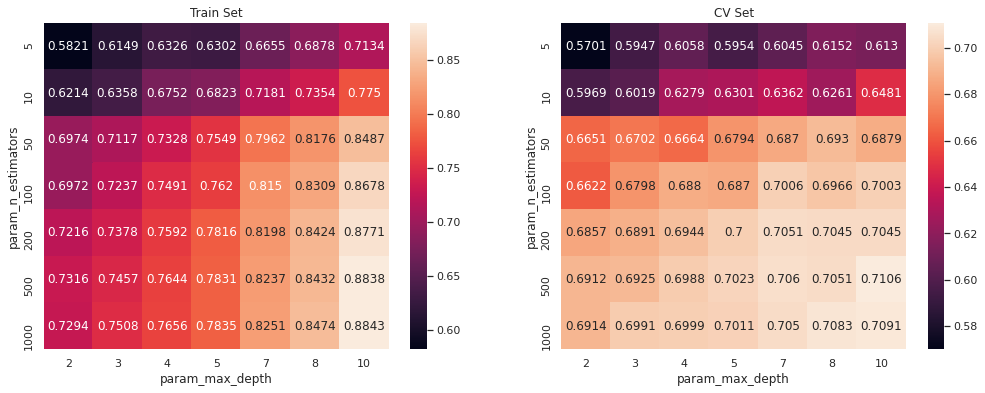

In [0]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(17,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [0]:
clf.best_estimator_ #best parameters as per gridsearch

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
opt_params= clf.best_params_

In [0]:
opt_params

{'max_depth': 10, 'n_estimators': 500}

In [0]:
best_parameters=[{'n_estimators': [opt_params.get("n_estimators")], 'max_depth':[opt_params.get("max_depth")]}]

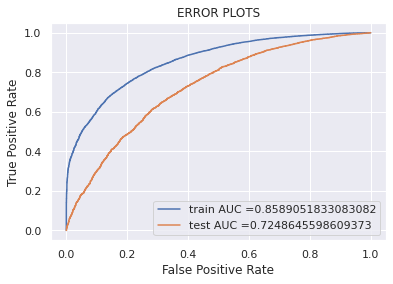

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

rf= RandomForestClassifier(class_weight='balanced')
clf = GridSearchCV(rf, best_parameters)
#sets max_depth= 10 and n_estimators= 1000 i.e best parameters
clf.fit(X_set1_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_set1_train) [:,1]
y_test_pred = clf.predict_proba(X_set1_test) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.6 for threshold 0.5


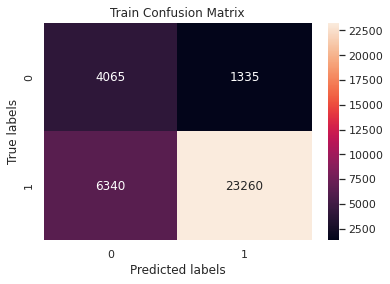

In [0]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.45 for threshold 0.52


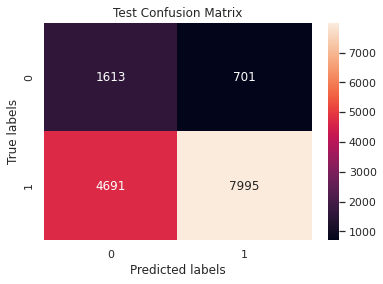

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## Random Forest on TFIDF (SET-2):

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5, 7, 8, 10]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_set2_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

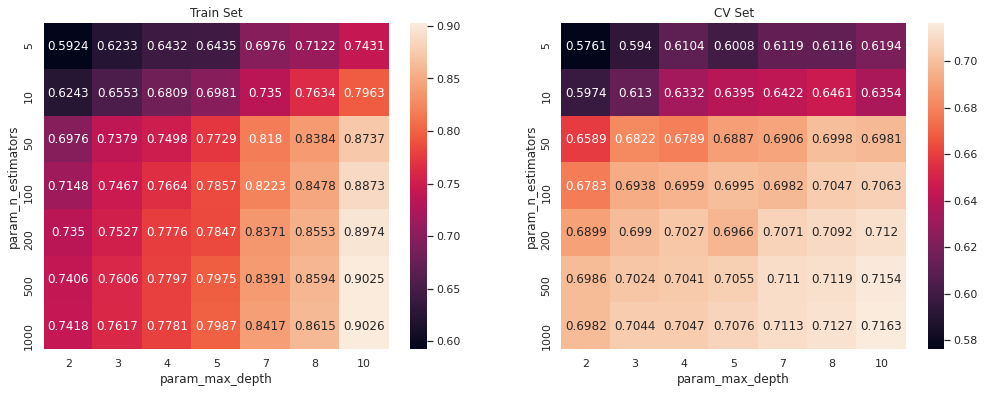

In [0]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(17,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [0]:
clf.best_estimator_ #best parameters as per gridsearch

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
opt_params= clf.best_params_

In [0]:
opt_params

{'max_depth': 10, 'n_estimators': 1000}

In [0]:
best_parameters=[{'n_estimators': [opt_params.get("n_estimators")], 'max_depth':[opt_params.get("max_depth")]}]

In [0]:
best_parameters

[{'max_depth': [10], 'n_estimators': [1000]}]

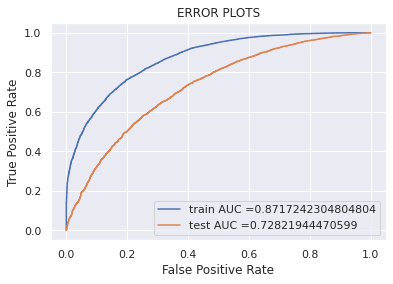

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

rf= RandomForestClassifier(class_weight='balanced')
clf = GridSearchCV(rf, best_parameters)
#sets max_depth= 10 and n_estimators= 1000 i.e best parameters
clf.fit(X_set2_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_set2_train) [:,1]
y_test_pred = clf.predict_proba(X_set2_test) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.61 for threshold 0.5


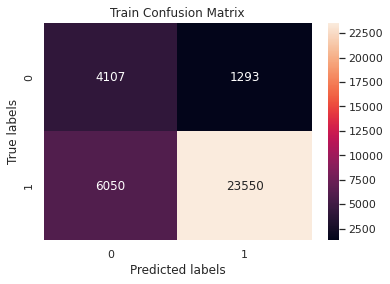

In [0]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.45 for threshold 0.52


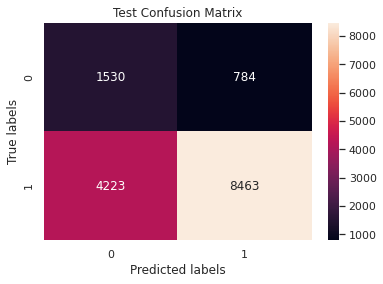

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## Random Forest on AVG W2V (SET-3):

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5, 7, 8, 10]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_set3_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

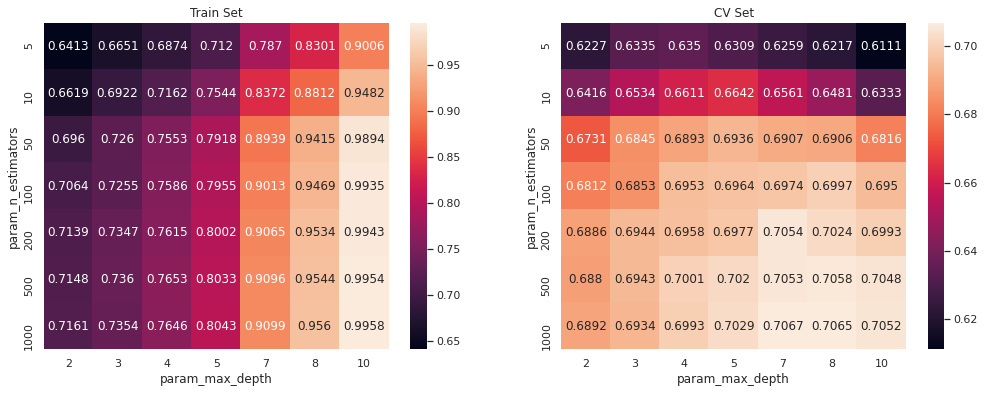

In [0]:
import seaborn as sns; sns.set()

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(17,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [0]:
#best parameters as per gridsearch
opt_params= clf.best_params_
best_parameters=[{'n_estimators': [opt_params.get("n_estimators")], 'max_depth':[opt_params.get("max_depth")]}]
print (best_parameters)

[{'n_estimators': [1000], 'max_depth': [7]}]


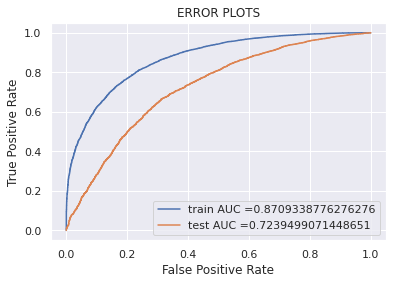

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

rf= RandomForestClassifier(class_weight='balanced')
clf = GridSearchCV(rf, best_parameters)
#sets max_depth= 10 and n_estimators= 1000 i.e best parameters
clf.fit(X_set3_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_set3_train) [:,1]
y_test_pred = clf.predict_proba(X_set3_test) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.62 for threshold 0.52


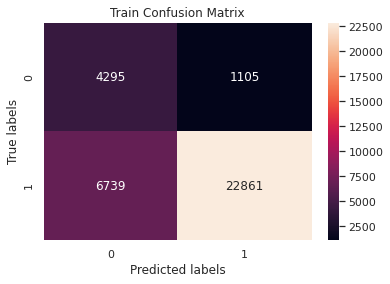

In [0]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.46 for threshold 0.55


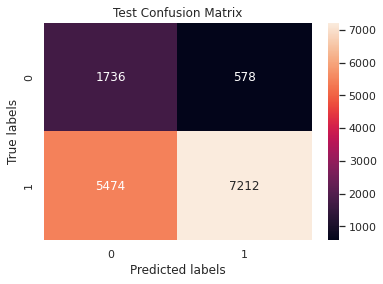

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## Random Forest on TFIDF W2V (SET-4):

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier(class_weight='balanced',min_samples_split=5)
parameters = {'n_estimators': [5, 10, 50, 100, 200, 500, 1000], 'max_depth':[2, 3, 4, 5, 7, 8, 10]}
clf = GridSearchCV(rf, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf.fit(X_set4_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

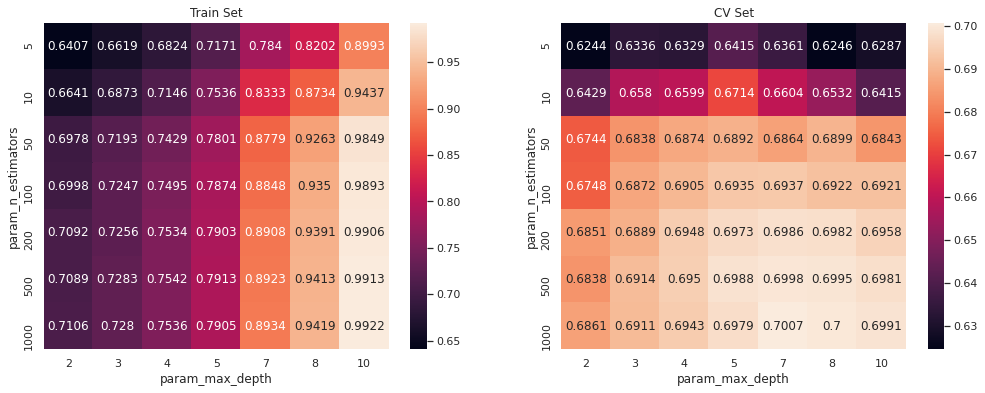

In [0]:
import seaborn as sns; sns.set()

max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(17,6))

sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')

plt.show()

In [0]:
#best parameters as per gridsearch
opt_params= clf.best_params_
best_parameters=[{'n_estimators': [opt_params.get("n_estimators")], 'max_depth':[opt_params.get("max_depth")]}]
print (best_parameters)

[{'n_estimators': [1000], 'max_depth': [7]}]


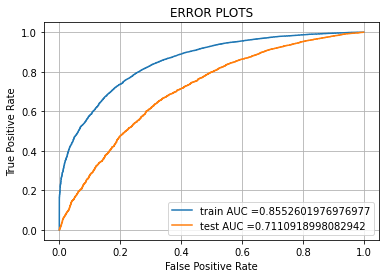

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

rf= RandomForestClassifier(class_weight='balanced')
clf = GridSearchCV(rf, best_parameters)
#sets max_depth= 10 and n_estimators= 1000 i.e best parameters
clf.fit(X_set4_train, Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = clf.predict_proba(X_set4_train) [:,1]
y_test_pred = clf.predict_proba(X_set4_test) [:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

the maximum value of tpr*(1-fpr) 0.59 for threshold 0.51


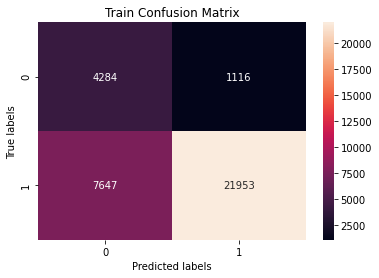

In [0]:
ax=plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds,train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.44 for threshold 0.54


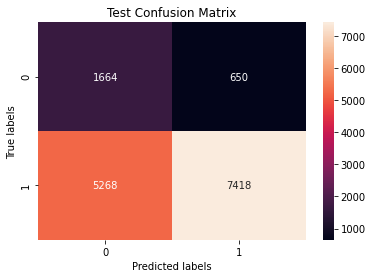

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

# Using XGB:

## XGB on BOW:

In [0]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

xgb= XGBClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10] }
clf= GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', return_train_score= True)
clf.fit(X_set1_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                        

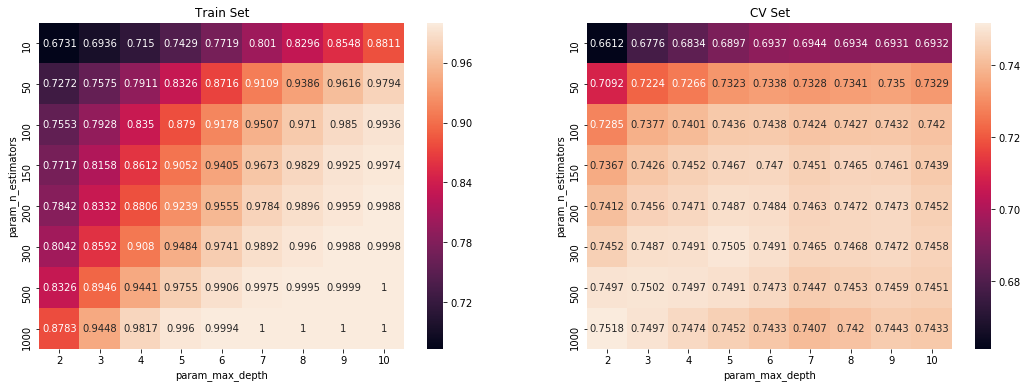

In [0]:
import seaborn as sns

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


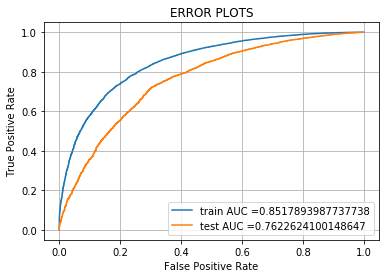

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBClassifier
clf = xgb(max_depth=2,n_estimators=1000)
clf.fit(X_set1_train, Y_train)

y_train_pred = clf.predict_proba(X_set1_train) [:,1]
y_test_pred = clf.predict_proba(X_set1_test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.6 for threshold 0.83


Text(0.5,1,'Train Confusion Matrix')

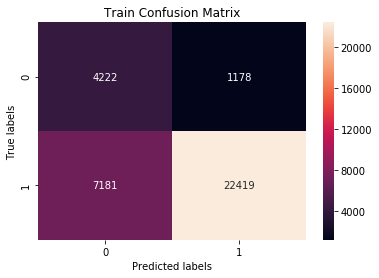

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.5 for threshold 0.86


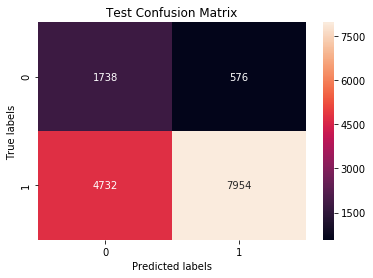

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## XGB on TFIDF:

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb= XGBClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10] }
clf= GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', return_train_score= True)
clf.fit(X_set2_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                        

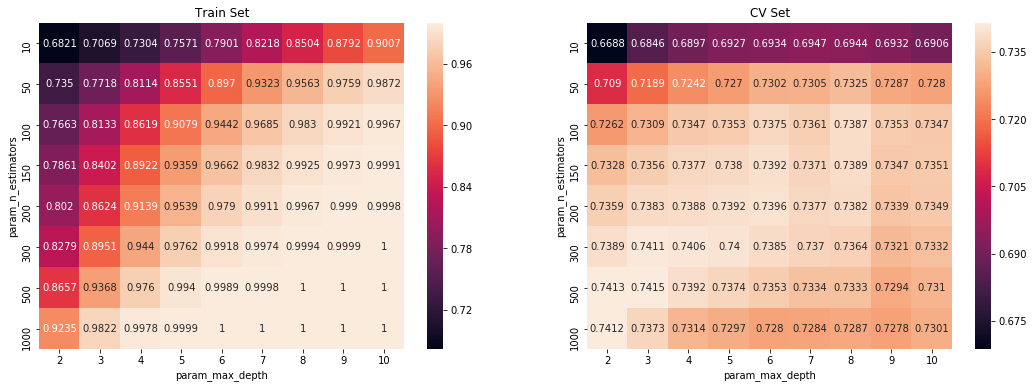

In [0]:
import seaborn as sns

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


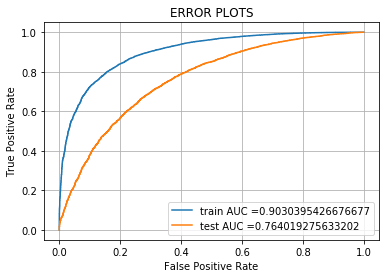

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBClassifier
clf = xgb(max_depth=3,n_estimators=500)
clf.fit(X_set2_train, Y_train)

y_train_pred = clf.predict_proba(X_set2_train) [:,1]
y_test_pred = clf.predict_proba(X_set2_test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.67 for threshold 0.81


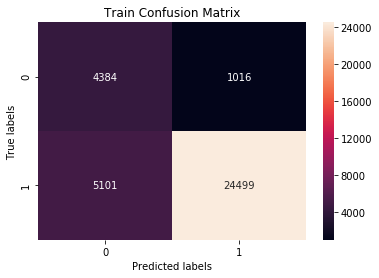

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.49 for threshold 0.87


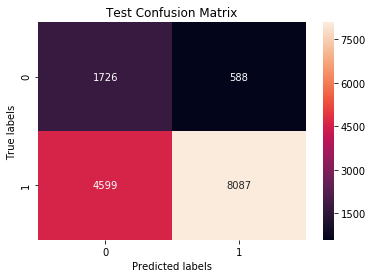

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## XGB on AVG W2V:

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb= XGBClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10] }
clf= GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', return_train_score= True)
clf.fit(X_set3_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                        

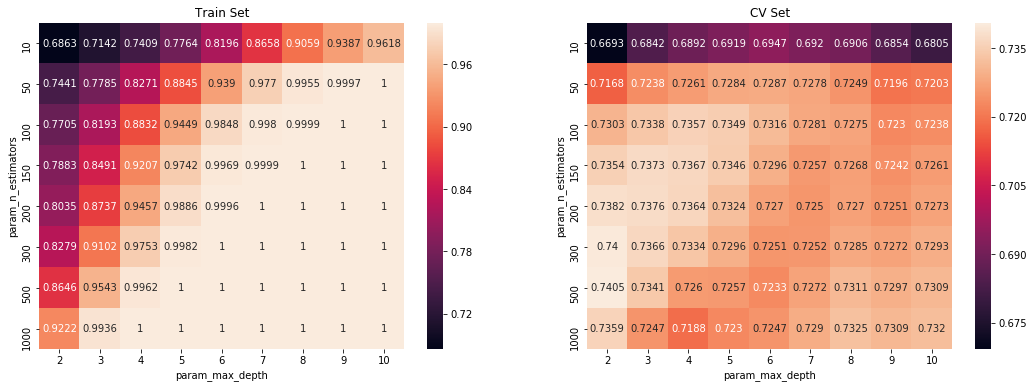

In [0]:
import seaborn as sns

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


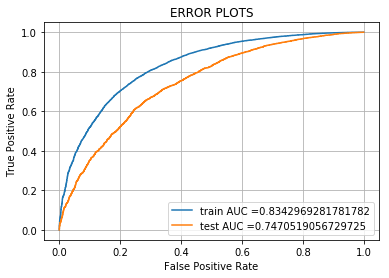

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBClassifier
clf = xgb(max_depth=2,n_estimators=500)
clf.fit(X_set3_train, Y_train)

y_train_pred = clf.predict_proba(X_set3_train) [:,1]
y_test_pred = clf.predict_proba(X_set3_test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.57 for threshold 0.83


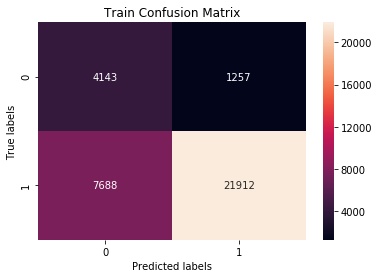

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.47 for threshold 0.85


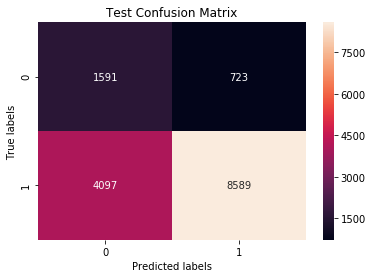

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

## XGB on TFIDF W2V:

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

xgb= XGBClassifier()
parameters = {'n_estimators': [10, 50, 100, 150, 200, 300, 500, 1000], 'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10] }
clf= GridSearchCV(xgb, parameters, cv=3, scoring='roc_auc', return_train_score= True)
clf.fit(X_set4_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200, 300, 500,
                        

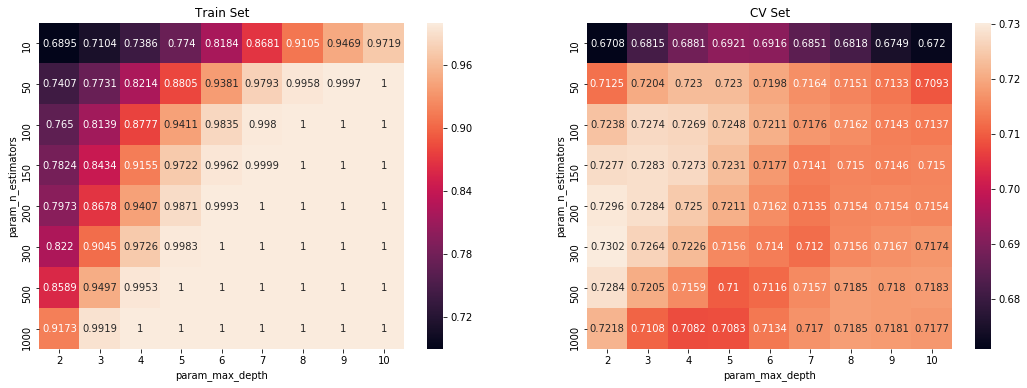

In [0]:
import seaborn as sns

max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(18,6))

sns.heatmap(max_scores1.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores1.mean_test_score, annot = True, fmt='.4g', ax=ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [0]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


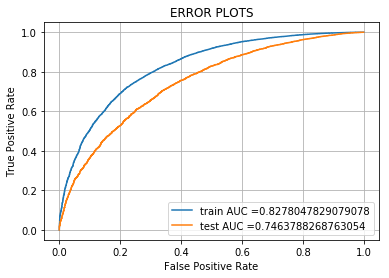

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

xgb= XGBClassifier
clf = xgb(max_depth=2,n_estimators=300)
clf.fit(X_set4_train, Y_train)

y_train_pred = clf.predict_proba(X_set4_train) [:,1]
y_test_pred = clf.predict_proba(X_set4_test) [:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

In [0]:
def predict(proba, threshould, fpr, tpr):
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", np.round(max(tpr*(1-fpr)),2) , "for threshold", np.round(t,2))
    predictions = []
    global predictions1
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1= predictions
    return predictions

the maximum value of tpr*(1-fpr) 0.56 for threshold 0.83


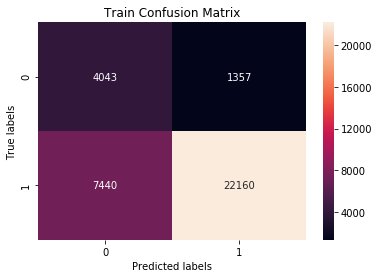

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Train Confusion Matrix');

the maximum value of tpr*(1-fpr) 0.47 for threshold 0.85


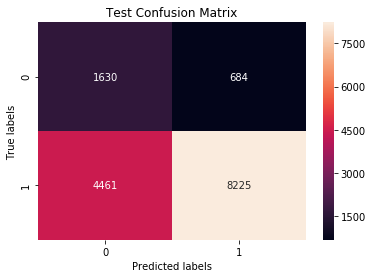

In [0]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr)),annot=True,ax=ax, fmt='g');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Test Confusion Matrix');

# Conclusion

In [0]:
# https://ptable.readthedocs.io/en/latest/tutorial.html
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]


x.add_row(["BOW", "Random Forest", "10 (Max Depth), 500 (n_estimators)" , 0.714])
x.add_row(["TFIDF", "Random Forest", "10 (Max Depth), 1000 (n_estimators)" , 0.7282])
x.add_row(["AVG W2V", "Random Forest", "7 (Max Depth), 1000 (n_estimators)" , 0.7239])
x.add_row(["TFIDF W2V", "Random Forest", "7 (Max Depth), 1000 (n_estimators)" , 0.7110])
x.add_row(["BOW", "Gradient Boosting DT", "2 (Max Depth), 1000 (n_estimators)" , 0.7622])
x.add_row(["TFIDF", "Gradient Boosting DT", "3 (Max Depth), 500 (n_estimators)" , 0.76401])
x.add_row(["AVG W2V", "Gradient Boosting DT", "2 (Max Depth), 500 (n_estimators)" , 0.74705])
x.add_row(["TFIDF W2V", "Gradient Boosting DT", "2 (Max Depth), 300 (n_estimators)" , 0.7463])

print (x)

+------------+----------------------+-------------------------------------+---------+
| Vectorizer |        Model         |           Hyper Parameter           |   AUC   |
+------------+----------------------+-------------------------------------+---------+
|    BOW     |    Random Forest     |  10 (Max Depth), 500 (n_estimators) |  0.714  |
|   TFIDF    |    Random Forest     | 10 (Max Depth), 1000 (n_estimators) |  0.7282 |
|  AVG W2V   |    Random Forest     |  7 (Max Depth), 1000 (n_estimators) |  0.7239 |
| TFIDF W2V  |    Random Forest     |  7 (Max Depth), 1000 (n_estimators) |  0.711  |
|    BOW     | Gradient Boosting DT |  2 (Max Depth), 1000 (n_estimators) |  0.7622 |
|   TFIDF    | Gradient Boosting DT |  3 (Max Depth), 500 (n_estimators)  | 0.76401 |
|  AVG W2V   | Gradient Boosting DT |  2 (Max Depth), 500 (n_estimators)  | 0.74705 |
| TFIDF W2V  | Gradient Boosting DT |  2 (Max Depth), 300 (n_estimators)  |  0.7463 |
+------------+----------------------+-----------------